<a href="https://colab.research.google.com/github/deujahritik/AI_midterm_12194824/blob/main/Week_6_lab_Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import cv2


In [30]:
img_database = np.loadtxt('fashion-mnist_train.csv', delimiter=',', skiprows=1)[:,1:]
#looking at the shape of the file
print(img_database.shape)


total_num_images = (img_database.shape[0])

OSError: ignored

In [29]:
n_input = 784 #Input image is of size 28 x 28
hidden_layer_1 = 256
hidden_layer_2 = 32
hidden_layer_3 = 32
hidden_layer_4 = 256
output_layer = 784  #Same as the n_input dimension

# Parameters
learning_rate = 0.1
epochs = 100
batch_size = 100

# Define the placeholders
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, output_layer])

In [31]:
Weight_NN = {"W1": tf.Variable(tf.random_normal([n_input, hidden_layer_1])),
             "W2": tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2])),
             "W3": tf.Variable(tf.random_normal([hidden_layer_2, hidden_layer_3])),
             "W4": tf.Variable(tf.random_normal([hidden_layer_3, hidden_layer_4])),
             "W5": tf.Variable(tf.random_normal([hidden_layer_4, output_layer]))
             }
Bias_NN = { "B1": tf.Variable(tf.random_normal([hidden_layer_1])),
            "B2": tf.Variable(tf.random_normal([hidden_layer_2])),
            "B3": tf.Variable(tf.random_normal([hidden_layer_3])),
            "B4": tf.Variable(tf.random_normal([hidden_layer_4])),
            "B5": tf.Variable(tf.random_normal([output_layer]))
           }

In [32]:
Z1 = tf.add(tf.matmul(X, Weight_NN["W1"]), Bias_NN["B1"])
Z1_out = tf.nn.sigmoid(Z1)

Z2 = tf.add(tf.matmul(Z1_out, Weight_NN["W2"]), Bias_NN["B2"])
Z2_out = tf.nn.sigmoid(Z2)

Z3 = tf.add(tf.matmul(Z2_out, Weight_NN["W3"]), Bias_NN["B2"])
Z3_out = tf.nn.sigmoid(Z3)

Z4 = tf.add(tf.matmul(Z3_out, Weight_NN["W4"]), Bias_NN["B4"])
Z4_out = tf.nn.sigmoid(Z4)

Z5 = tf.add(tf.matmul(Z4_out, Weight_NN["W5"]), Bias_NN["B5"])
Z5_out = tf.nn.sigmoid(Z5)

In [33]:

Z1 = tf.layers.dense(X, hidden_layer_1, activation = tf.nn.sigmoid)
Z2 = tf.layers.dense(Z1, hidden_layer_2, activation = tf.nn.sigmoid)
Z3 = tf.layers.dense(Z1, hidden_layer_3, activation = tf.nn.sigmoid)
Z4 = tf.layers.dense(Z1, hidden_layer_4, activation = tf.nn.sigmoid)
NN_output = tf.layers.dense(Z4, output_layer)

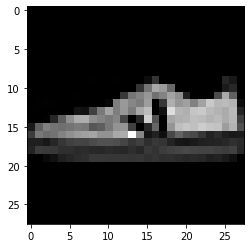

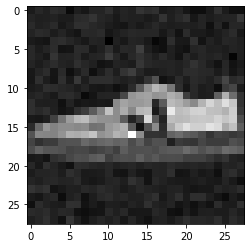

In [ ]:
# Dataset preparation

# Shuffle the dataset
np.random.shuffle(img_database)

X_train = img_database

# Normalize the dataset
X_train = X_train

# Create a noisy dataset
X_train_noisy = X_train + 10* np.random.normal(0,1, size = X_train.shape)

#Original image
plt.imshow(X_train[0].reshape(28,28), cmap = 'gray')
plt.show()

#Noisy image
plt.imshow(X_train_noisy[0].reshape(28,28), cmap = 'gray')
plt.show()

# New Section

In [34]:
#Define the metrics

# The loss function
computed_loss = tf.reduce_mean(tf.square(NN_output-Y))

# Define the optimizer
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(computed_loss)

# Initialize the variables
init = tf.global_variables_initializer()

In [40]:
sess = tf.Session()
sess.run(init)
for epoch in range(epochs):
  for i in range(int(total_num_images/batch_size)):
    X_epoch = X_train[ i*batch_size : (i+1)*batch_size ]
    X_noise_epoch = X_train_noisy[ i*batch_size : (i+1)*batch_size ]
    _, loss = sess.run([optimizer, computed_loss], feed_dict = {X: X_noise_epoch, Y: X_epoch})
  print('Epoch', epoch, '/', epochs, 'loss:', loss)

# pick any image
X_actual = X_train[:10]
noisy_image = X_train_noisy[:10]

# run it though the autoencoder
denoised_image = sess.run(NN_output, feed_dict={X:noisy_image})

NameError: ignored

In [39]:
X_actual = X_train[20:30]
noisy_image = X_train_noisy[20:30]
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for i in range(int(total_num_images/batch_size)):
      X_epoch = X_train[ i*batch_size : (i*1)*batch_size ]
      X_noise_epoch = X_train_noisy[i*batch_size : (i*1)*batch_size ]
      _, loss = sess.run([optimizer, computed_loss], feed_dict={X: X_noise_epoch, Y: X_epoch})
    print('Epoch', epoch, '/', epochs, 'loss:', loss)
  denoised_image = sess.run(NN_output, feed_dict = {X:noisy_image})

#pick any image
  

# print the original image 
fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_actual, noisy_image, denoised_image], axes):
    for img, ax in zip(images,row):
        ax.imshow(img.reshape((28,28)), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

NameError: ignored